## Exploratory Data Analysis

Data sources
- load.csv
- payment.csv
- clarity_underwriting_variables.csv

### Import Packages

In [1]:
import os
import sys
import numpy as np

sys.path.append(os.path.abspath(os.path.join('../')))
os.chdir('../')

In [2]:
from src.utils.data_extractor import DataExtractor
from src.utils.eda_analyzer import EDAAnalyzer
from src.utils.data_preprocessor import DataPreprocessor

### Load the loan dataset

In [160]:
loan_filepath = "data/loan.csv"
payment_filepath = 'data/payment.csv'
underwriting_filepath = 'data/clarity_underwriting_variables.csv'

loan_df = DataExtractor.extract_csv(file_path=loan_filepath)
payment_df = DataExtractor.extract_csv(file_path=payment_filepath)
underwriting_df = DataExtractor.extract_csv(file_path=underwriting_filepath)

2024-09-19 08:11:09,391 - INFO - Extracted data from CSV file: data/loan.csv
2024-09-19 08:11:10,069 - INFO - Extracted data from CSV file: data/payment.csv
/home/babi/jobs/moneylion/m/Loan-Risk-Prediction-Pipeline/src/utils/data_extractor.py:23: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, **kwargs)
2024-09-19 08:11:10,421 - INFO - Extracted data from CSV file: data/clarity_underwriting_variables.csv


In [4]:
loan_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [5]:
payment_df.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [6]:
underwriting_df.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


## Loan Dataset EDA

In [7]:
loan_eda = EDAAnalyzer(loan_df)
loan_preprocessor = DataPreprocessor(loan_df)

#### Data Summary

In [8]:
loan_eda.summarize_data()

2024-09-19 06:33:55,516 - INFO - Generating summary statistics...



--- Dataset Overview ---
Rows: 577682, Columns: 19

--- Data Types ---
loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--- Numeric Features Summary ---
                                     count  

In [9]:
loan_eda.df[["originatedDate", "applicationDate"]].head()

,originatedDate,applicationDate
0,NaN,2016-02-23T17:29:01.940000
1,2016-01-20T15:49:18.846000,2016-01-19T22:07:36.778000
2,NaN,2016-08-01T13:51:14.709000
3,NaN,2015-08-06T23:58:08.880000
4,NaN,2016-06-05T22:31:34.304000


#### Fix the datatypes of the columns for date type

In [10]:
loan_preprocessor.change_data_type(columns=["originatedDate", "applicationDate"], dtype="datetime")
print(loan_preprocessor.get_preprocessed_data()[["originatedDate", "applicationDate"]].head())

2024-09-19 06:33:58,380 - INFO - Converted column originatedDate to datetime.
2024-09-19 06:33:58,824 - INFO - Converted column applicationDate to datetime.


           originatedDate         applicationDate
0                     NaT 2016-02-23 17:29:01.940
1 2016-01-20 15:49:18.846 2016-01-19 22:07:36.778
2                     NaT 2016-08-01 13:51:14.709
3                     NaT 2015-08-06 23:58:08.880
4                     NaT 2016-06-05 22:31:34.304


In [11]:
loan_eda = EDAAnalyzer(loan_preprocessor.get_preprocessed_data())
loan_eda.summarize_data()

2024-09-19 06:33:59,163 - INFO - Generating summary statistics...



--- Dataset Overview ---
Rows: 577682, Columns: 19

--- Data Types ---
loanId                                      object
anon_ssn                                    object
payFrequency                                object
apr                                        float64
applicationDate                     datetime64[ns]
originated                                    bool
originatedDate                      datetime64[ns]
nPaidOff                                   float64
approved                                      bool
isFunded                                     int64
loanStatus                                  object
loanAmount                                 float64
originallyScheduledPaymentAmount           float64
state                                       object
leadType                                    object
leadCost                                     int64
fpStatus                                    object
clarityFraudId                              object
hasCF     

#### Missing Value Analysis

2024-09-19 06:34:01,152 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                 Missing Values  Percentage
originatedDate           531690   92.038526
fpStatus                 525959   91.046458
clarityFraudId           219989   38.081332
apr                        3922    0.678920
loanAmount                 2250    0.389488
payFrequency               1273    0.220363
applicationDate             581    0.100574
loanStatus                  391    0.067684
loanId                      256    0.044315
state                       132    0.022850
nPaidOff                     24    0.004155


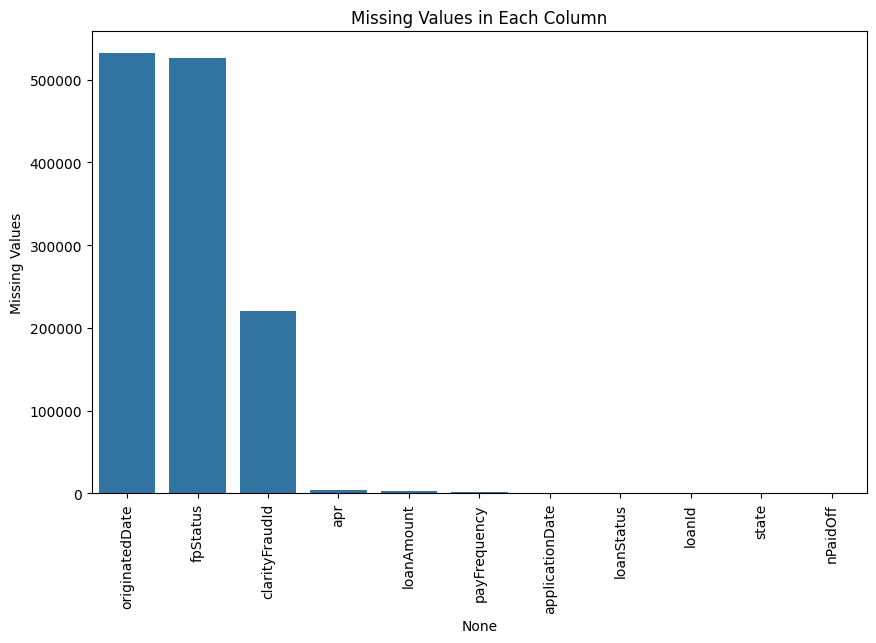

In [12]:
loan_eda.missing_values_analysis()

In [13]:
loan_df[loan_df["payFrequency"].isna()][['loanStatus']].value_counts(dropna=False)

loanStatus           
Withdrawn Application    1141
Rejected                  128
NaN                         3
Settled Bankruptcy          1
Name: count, dtype: int64

In [14]:
loan_df[loan_df["loanAmount"].isna()][['loanStatus']].value_counts(dropna=False)

loanStatus           
Withdrawn Application    1931
NaN                       256
Rejected                   63
Name: count, dtype: int64

In [15]:
loan_df[loan_df["apr"].isna()][['loanStatus']].value_counts(dropna=False)

loanStatus           
Withdrawn Application    3580
NaN                       256
Rejected                   86
Name: count, dtype: int64

In [16]:
loan_df[loan_df["apr"].isna()][loan_df['loanAmount'].isna()].shape

/tmp/ipykernel_1274815/4192613636.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loan_df[loan_df["apr"].isna()][loan_df['loanAmount'].isna()].shape


(2221, 19)

### Missing Values Handling

- **`fpStatus`**: Replaced missing values with `'NoAchAttempt'`.
- **`nPaidOff`**: Replaced missing values with `0`.
- **`state`**: Replaced missing values with most frequent state.
- **`loanId`, `apr`, `loanAmount`, `payFrequency`, `loanStatus`**: Dropped rows with missing values to ensure data integrity and usable for modelling. 

In [17]:
import numpy as np
loan_preprocessor.replace_values([
    {
        'column': 'fpStatus',
        'from': np.nan,
        'to': 'NoAchAttempt'
    },
    {
        'column': 'nPaidOff',
        'from': np.nan,
        'to': 0
    }
    
    ])

loan_preprocessor.drop_rows_with_nulls_in_columns(columns=['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus'])
loan_preprocessor.handle_missing_values(strategy='most_frequent', columns=['state'])

2024-09-19 06:34:02,036 - INFO - Replaced nan with NoAchAttempt in column: fpStatus


2024-09-19 06:34:02,043 - INFO - Replaced nan with 0 in column: nPaidOff
2024-09-19 06:34:02,288 - INFO - Dropped rows with null values in column loanId. Before: (577682, 19), After: (577426, 19)
2024-09-19 06:34:02,463 - INFO - Dropped rows with null values in column apr. Before: (577426, 19), After: (573760, 19)
2024-09-19 06:34:02,603 - INFO - Dropped rows with null values in column loanAmount. Before: (573760, 19), After: (573731, 19)
2024-09-19 06:34:02,759 - INFO - Dropped rows with null values in column payFrequency. Before: (573731, 19), After: (572512, 19)
2024-09-19 06:34:02,908 - INFO - Dropped rows with null values in column loanStatus. Before: (572512, 19), After: (572377, 19)
2024-09-19 06:34:02,909 - INFO - Final shape after dropping rows with null values in columns: ['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus']. Initial shape: (577682, 19), Final shape: (572377, 19)
2024-09-19 06:34:03,026 - INFO - Handled missing values for column: state using strategy:

2024-09-19 06:34:03,313 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                 Missing Values  Percentage
originatedDate           526388   91.965261
clarityFraudId           217343   37.972001
applicationDate             574    0.100284


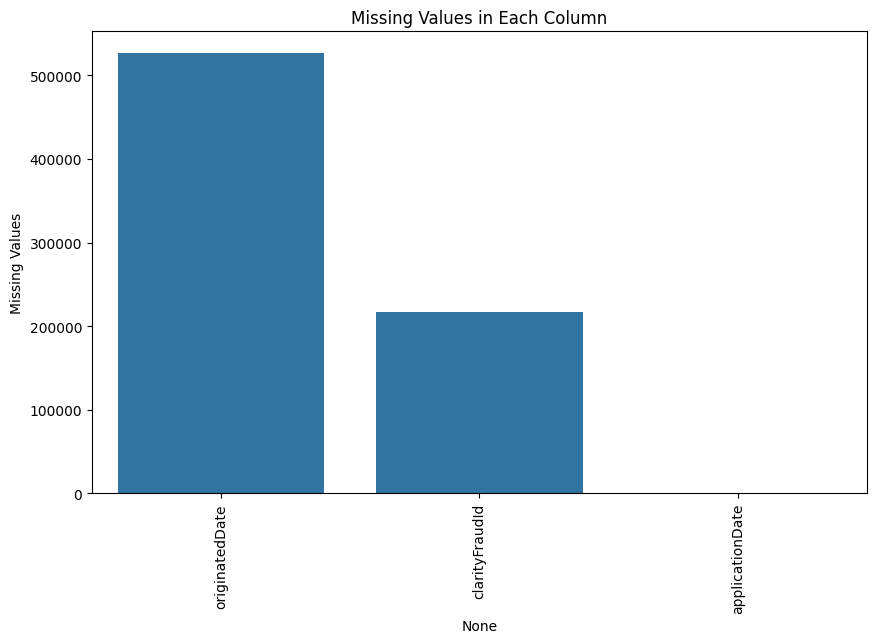

In [18]:
loan_eda = EDAAnalyzer(loan_preprocessor.get_preprocessed_data())
loan_eda.missing_values_analysis()

### Drive days between application date and originated data

In [19]:
from src.utils.utils import add_loan_age
loan_df = add_loan_age(loan_df)

In [20]:
loan_df[['loan_age']].value_counts(dropna=False)

loan_age
-1.0        531737
 0.0         36943
 1.0          3524
 2.0          1704
 3.0           982
 4.0           644
 5.0           524
 6.0           383
 7.0           345
 8.0           190
 9.0           152
 10.0          101
 11.0           90
 14.0           52
 13.0           48
 12.0           48
 16.0           27
 17.0           21
 19.0           16
 15.0           15
 18.0           13
 20.0           10
 26.0           10
 22.0            9
 27.0            8
 23.0            8
 21.0            7
 24.0            7
 28.0            6
 25.0            6
 42.0            5
 32.0            4
 33.0            4
 29.0            4
 30.0            3
 31.0            3
 34.0            3
 35.0            3
 45.0            2
 52.0            2
 38.0            2
 39.0            1
 203.0           1
 159.0           1
 127.0           1
 123.0           1
 116.0           1
 87.0            1
 82.0            1
 79.0            1
 70.0            1
 68.0            1
 64

- ##### Added new column loan_age, drop applicationDate and originatedDate

In [21]:
loan_preprocessor.df['loan_age'] = loan_df['loan_age']
loan_preprocessor.drop_columns(columns = ['applicationDate', 'originatedDate'])
loan_eda = EDAAnalyzer(loan_preprocessor.get_preprocessed_data())

2024-09-19 06:34:04,438 - INFO - Dropped column: applicationDate
2024-09-19 06:34:04,588 - INFO - Dropped column: originatedDate


#### Correlation Matrix

2024-09-19 06:34:04,848 - INFO - Generating correlation matrix...


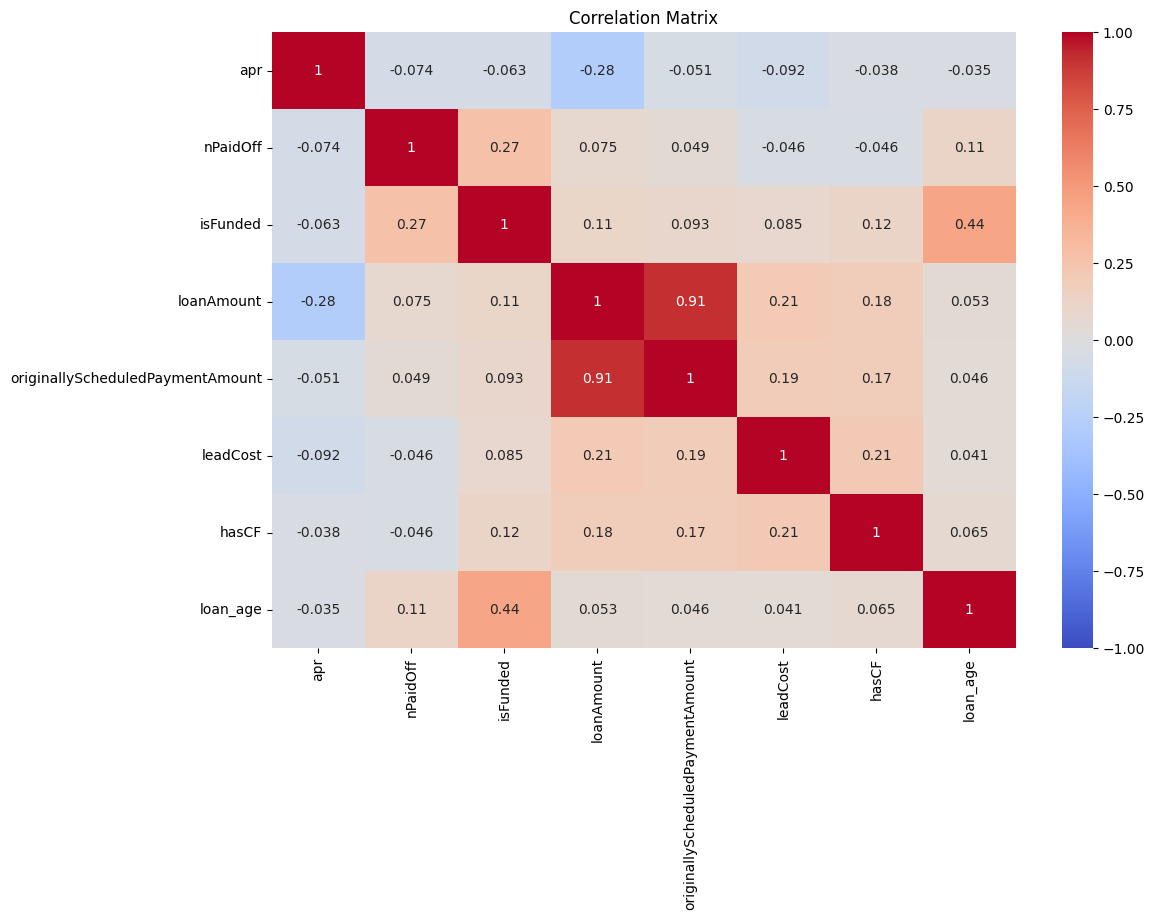

In [22]:
loan_eda.correlation_matrix()

### Correlation Insights

- **`loanAmount`** and **`originallyScheduledPaymentAmount`** are highly correlated (0.91)
- **`isFunded`** has a moderate positive correlation with **`loan_age`** (0.44), show takes long time to get funding.
- **`nPaidOff`** shows a weak negative correlation with **`apr`** (-0.074), implying that higher APR loans are less likely to be paid off.

2024-09-19 06:34:05,616 - INFO - Generating correlation matrix for all features...
2024-09-19 06:34:07,842 - INFO - Encoded column: loanId
2024-09-19 06:34:09,362 - INFO - Encoded column: anon_ssn
2024-09-19 06:34:09,504 - INFO - Encoded column: payFrequency
2024-09-19 06:34:09,628 - INFO - Encoded column: loanStatus
2024-09-19 06:34:09,751 - INFO - Encoded column: state
2024-09-19 06:34:09,874 - INFO - Encoded column: leadType
2024-09-19 06:34:09,989 - INFO - Encoded column: fpStatus
2024-09-19 06:34:11,086 - INFO - Encoded column: clarityFraudId


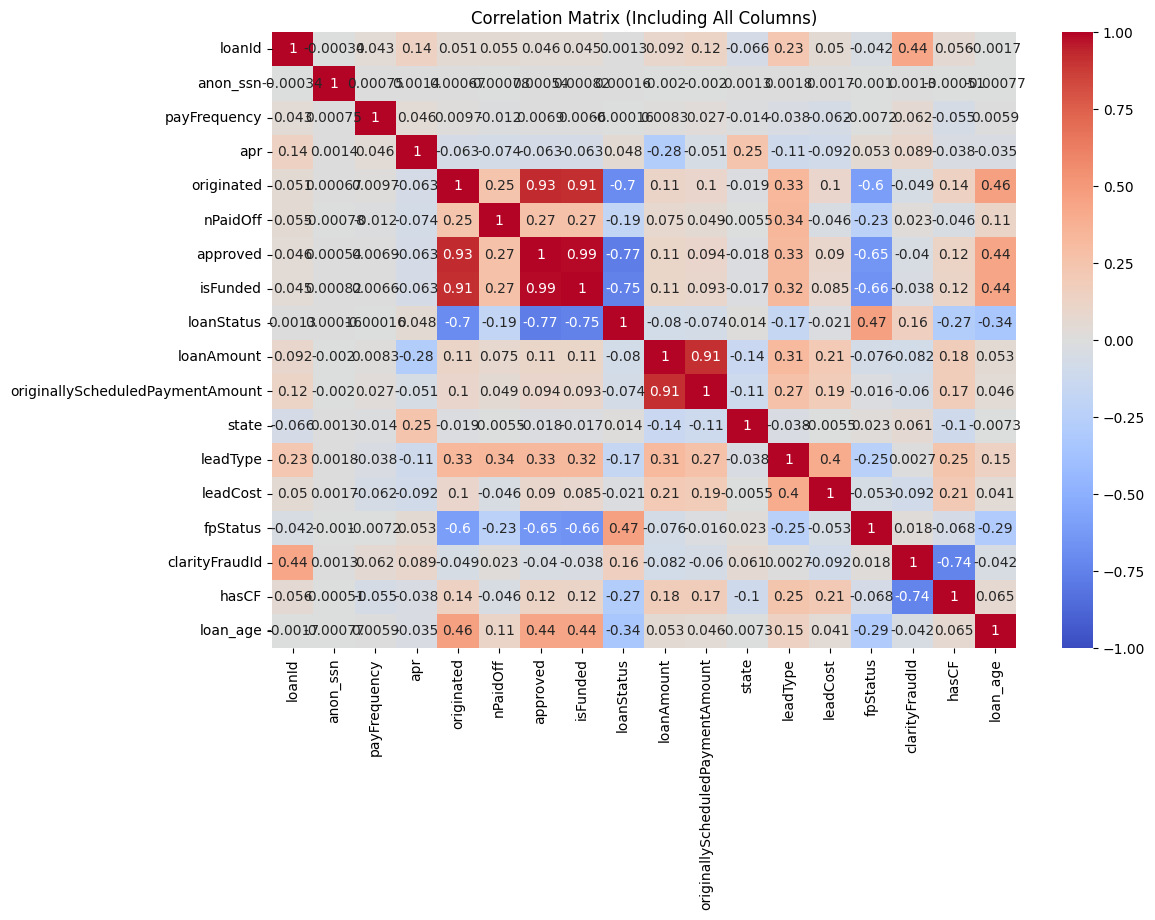

In [23]:
loan_eda.correlation_matrix_all_columns()

- **`originated`, `approved`, and `isFunded`** have very high positive correlations (0.91+), indicating that loans that are originated are highly likely to be approved and funded.

#### Distribution Plots

2024-09-19 06:34:13,328 - INFO - Generating distribution plots...


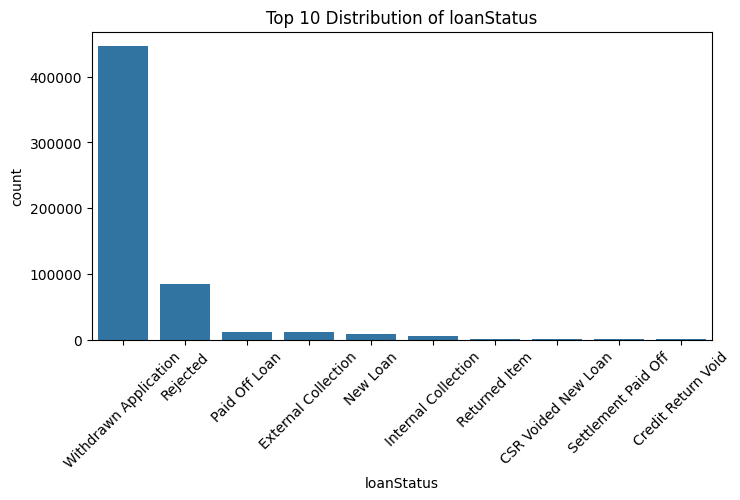

In [24]:
loan_eda.distribution_plots(columns=['loanStatus'])

In [25]:
loan_eda.df[["loanStatus"]].value_counts(dropna=False, normalize=True) * 100


loanStatus                 
Withdrawn Application          77.969939
Rejected                       14.825718
Paid Off Loan                   1.996411
External Collection             1.980163
New Loan                        1.417248
Internal Collection             0.972611
Returned Item                   0.206507
CSR Voided New Loan             0.179252
Settlement Paid Off             0.123695
Credit Return Void              0.122996
Customer Voided New Loan        0.088054
Settled Bankruptcy              0.056781
Pending Paid Off                0.029526
Charged Off Paid Off            0.027954
Pending Application Fee         0.000874
Pending Rescind                 0.000699
Pending Application             0.000699
Voided New Loan                 0.000349
Customver Voided New Loan       0.000175
Charged Off                     0.000175
Settlement Pending Paid Off     0.000175
Name: proportion, dtype: float64

#### Loan Status Distribution

- **Withdrawn Application**: 77.97%
- **Rejected**: 14.83%
- **Paid Off Loan**: 2.00%
- **External/Internal Collection**: close to 3.95%
- Others: Less than 1% each.

This distribution of loan status highly affect our model to predict most of the time Withdrawn Application

## Payment Dataset EDA

In [26]:
payment_eda = EDAAnalyzer(payment_df)
payment_preprocessor = DataPreprocessor(payment_df)

In [27]:
payment_df.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


#### Payment Data Summary

In [28]:
payment_eda.summarize_data()

2024-09-19 06:34:14,970 - INFO - Generating summary statistics...



--- Dataset Overview ---
Rows: 689364, Columns: 9

--- Data Types ---
loanId                object
installmentIndex       int64
isCollection            bool
paymentDate           object
principal            float64
fees                 float64
paymentAmount        float64
paymentStatus         object
paymentReturnCode     object
dtype: object

--- Numeric Features Summary ---
                     count        mean         std     min    25%    50%  \
installmentIndex  689364.0   10.553222    8.049530    1.00   5.00   9.00   
principal         689364.0   45.557543   81.724683 -303.37  13.18  27.61   
fees              689364.0   67.003994   59.789510  -42.56  28.82  51.30   
paymentAmount     689364.0  112.680232  105.783710 -337.70  56.81  86.34   

                     75%      max  
installmentIndex   14.00   105.00  
principal          53.38  4000.00  
fees               86.44  1257.71  
paymentAmount     135.09  4063.60  

--- Categorical Features Summary ---
                    c

#### Payment Missing Value Analysis

2024-09-19 06:34:15,690 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                   Missing Values  Percentage
paymentReturnCode          657831   95.425784
paymentStatus              164057   23.798313


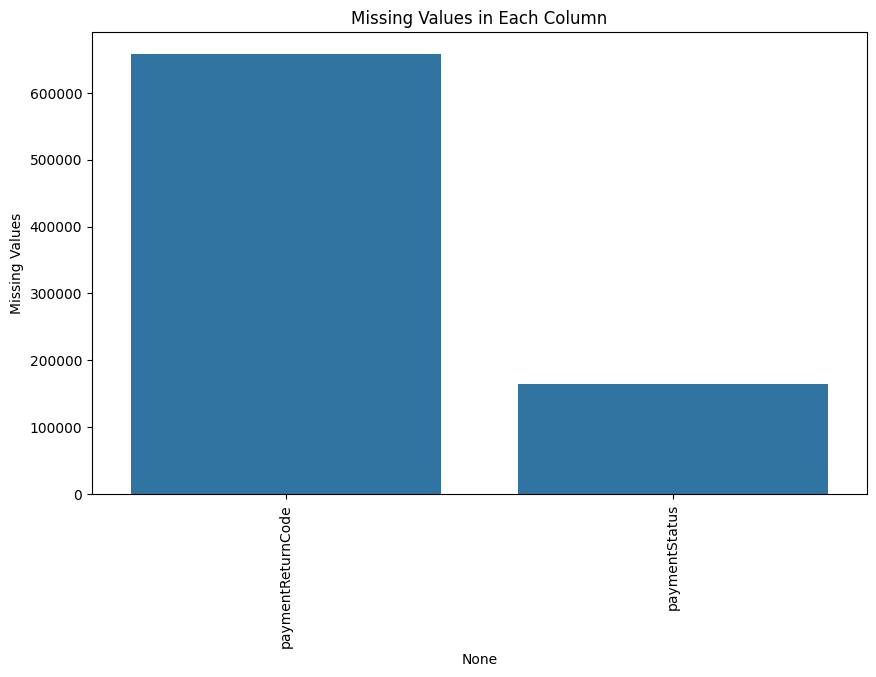

In [29]:
payment_eda.missing_values_analysis()

##### Handle Missing values
- Fill paymentReturnCode Unknown
- FillpaymentStatu NoAchAttempt

In [30]:
import numpy as np
payment_preprocessor.replace_values([
    {
        'column': 'paymentStatus',
        'from': np.nan,
        'to': 'NoAchAttempt'
    },
    {
        'column': 'paymentReturnCode',
        'from': np.nan,
        'to': 'Unknown'
    }
    
    ])

2024-09-19 06:34:16,220 - INFO - Replaced nan with NoAchAttempt in column: paymentStatus
2024-09-19 06:34:16,288 - INFO - Replaced nan with Unknown in column: paymentReturnCode


In [31]:
payment_eda = EDAAnalyzer(payment_preprocessor.get_preprocessed_data())

#### Payment Correlation Ananlysis

In [32]:
payment_eda.df[['loanId', 'paymentDate']].head()

,loanId,paymentDate
0,LL-I-00000021,2014-12-19T05:00:00
1,LL-I-00000021,2015-01-02T05:00:00
2,LL-I-00000021,2015-01-16T05:00:00
3,LL-I-00000021,2015-01-30T05:00:00
4,LL-I-00000021,2015-02-13T05:00:00


2024-09-19 06:34:16,519 - INFO - Generating correlation matrix for all features...
2024-09-19 06:34:16,967 - INFO - Encoded column: loanId
2024-09-19 06:34:17,197 - INFO - Encoded column: paymentDate
2024-09-19 06:34:17,353 - INFO - Encoded column: paymentStatus
2024-09-19 06:34:17,508 - INFO - Encoded column: paymentReturnCode


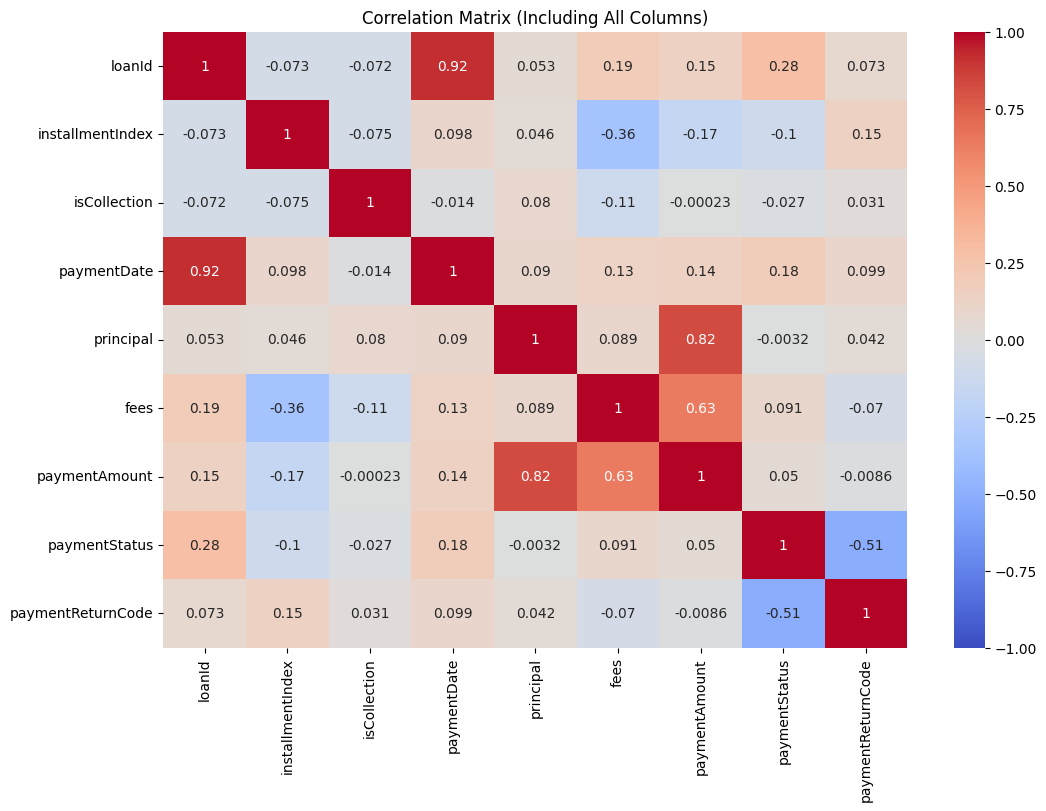

In [33]:
payment_eda.correlation_matrix_all_columns()

- principal and paymentAmount show a positive correlation (0.82), principal amount influences the total payment.
- fees and paymentAmount are moderately correlated (0.63), suggesting that fees contribute to the total payment.

#### Payment Distribution Plots

##### Iscollection

2024-09-19 06:34:18,287 - INFO - Generating distribution plots...


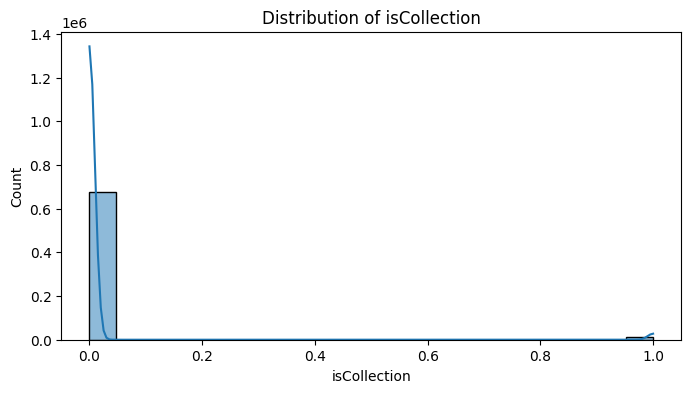

In [34]:
payment_eda.distribution_plots(columns=['isCollection'])

In [35]:
payment_eda.df[["isCollection"]].value_counts(dropna=False, normalize=True) * 100

isCollection
False           97.984374
True             2.015626
Name: proportion, dtype: float64

- only 2 percent have a custom made collection plan.

##### installmentIndex: nth payment for the loan

2024-09-19 06:34:22,200 - INFO - Generating distribution plots...


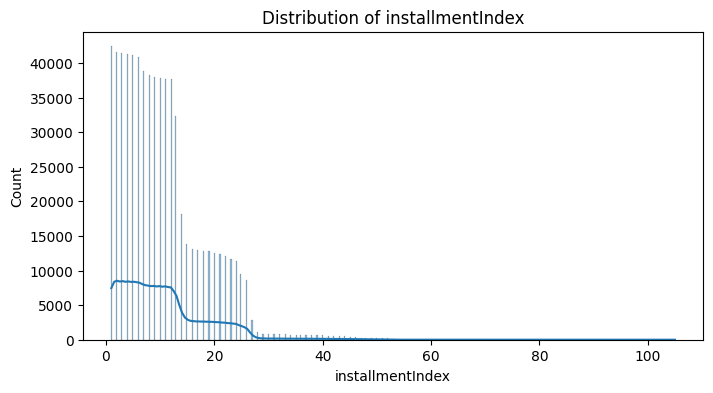

In [36]:
payment_eda.distribution_plots(columns=['installmentIndex'])

In [37]:
(payment_eda.df[["installmentIndex"]].value_counts(dropna=False, normalize=True) * 100)

installmentIndex
1                   6.148566
2                   6.040350
3                   6.007566
4                   5.983341
5                   5.964193
                      ...   
100                 0.001741
99                  0.001741
98                  0.001741
96                  0.001741
105                 0.000580
Name: proportion, Length: 105, dtype: float64

In [38]:
payment_eda.df.columns

Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')

##### principal

2024-09-19 06:34:26,888 - INFO - Generating distribution plots...


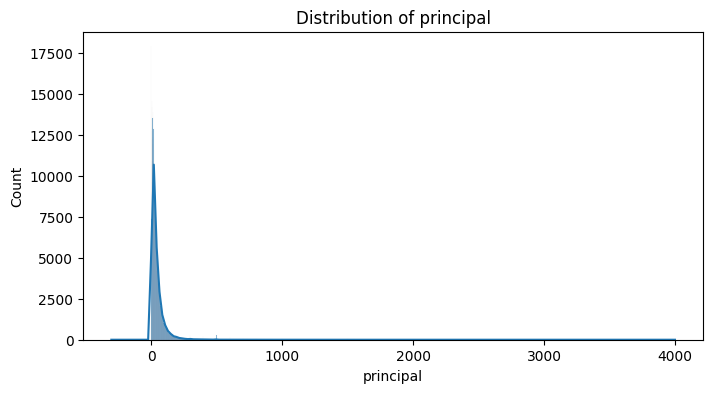

In [39]:
payment_eda.distribution_plots(columns=['principal'])

In [40]:
less_10 = (payment_eda.df["principal"] < 10).mean() * 100
less_50 = (payment_eda.df["principal"] < 50).mean() * 100
less_100 = (payment_eda.df["principal"] < 100).mean() * 100
less_500 = (payment_eda.df["principal"] < 500).mean() * 100
less_1000 = (payment_eda.df["principal"] < 1000).mean() * 100

print(f"Percentage of principal values less than 10: {less_10:.2f}%")
print(f"Percentage of principal values less than 50: {less_50:.2f}%")
print(f"Percentage of principal values less than 100: {less_100:.2f}%")
print(f"Percentage of principal values less than 500: {less_500:.2f}%")
print(f"Percentage of principal values less than 1000: {less_1000:.2f}%")


Percentage of principal values less than 10: 18.07%
Percentage of principal values less than 50: 72.74%
Percentage of principal values less than 100: 91.10%
Percentage of principal values less than 500: 99.59%
Percentage of principal values less than 1000: 99.89%


##### fees

2024-09-19 06:34:38,964 - INFO - Generating distribution plots...


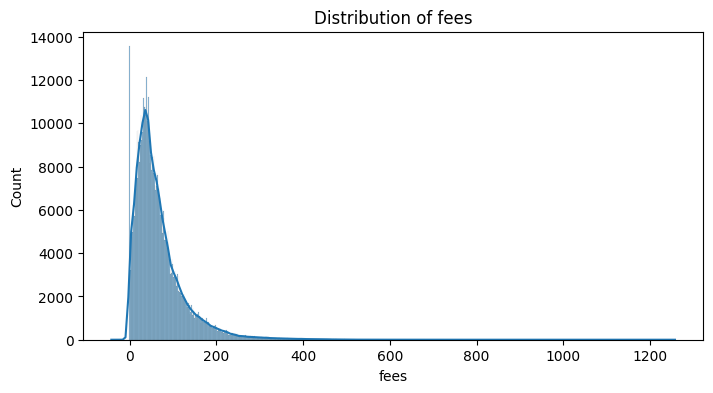

In [41]:
payment_eda.distribution_plots(columns=['fees'])

In [42]:
less_10 = (payment_eda.df["fees"] < 10).mean() * 100
less_50 = (payment_eda.df["fees"] < 50).mean() * 100
less_100 = (payment_eda.df["fees"] < 100).mean() * 100
less_500 = (payment_eda.df["fees"] < 500).mean() * 100

print(f"Percentage of fees values less than 10: {less_10:.2f}%")
print(f"Percentage of fees values less than 50: {less_50:.2f}%")
print(f"Percentage of fees values less than 100: {less_100:.2f}%")
print(f"Percentage of fees values less than 500: {less_500:.2f}%")

Percentage of fees values less than 10: 7.38%
Percentage of fees values less than 50: 48.84%
Percentage of fees values less than 100: 80.53%
Percentage of fees values less than 500: 99.94%


##### paymentReturnCode

2024-09-19 06:34:45,220 - INFO - Generating distribution plots...


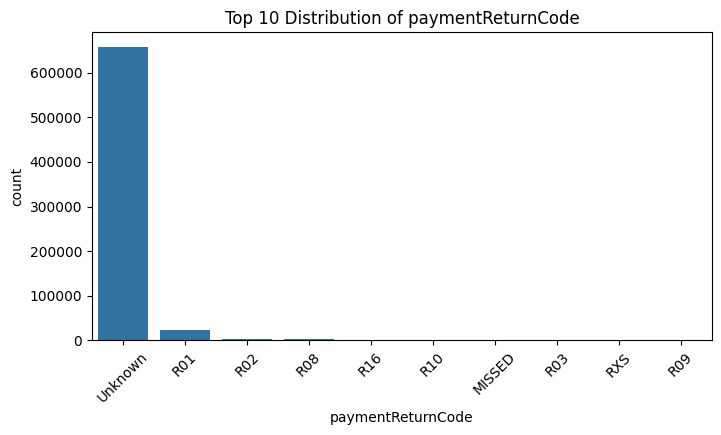

In [43]:
payment_eda.distribution_plots(columns=['paymentReturnCode'])

In [44]:
(payment_eda.df[["paymentReturnCode"]].value_counts(dropna=False, normalize=True) * 100)

paymentReturnCode
Unknown              95.425784
R01                   3.316970
R02                   0.400514
R08                   0.327693
R16                   0.157391
R10                   0.089938
MISSED                0.077898
R03                   0.046129
RXS                   0.032784
R09                   0.025531
R07                   0.023210
C05                   0.015376
C01                   0.012620
R20                   0.012040
R99                   0.008704
RAF                   0.008414
R04                   0.005657
C03                   0.004932
C02                   0.001451
LPP01                 0.001015
RWC                   0.001015
RUP                   0.000870
R06                   0.000870
RBW                   0.000725
R29                   0.000580
RFG                   0.000435
R15                   0.000435
C07                   0.000290
R13                   0.000290
RIR                   0.000145
R19                   0.000145
RXL                  

- 95.42 percent of paymnet failed with unknown reason
- 3.31 percent of payment failed due to Insufficient Funds

## Clarity Underwriting Dataset EDA

In [162]:
underwriting_df.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [163]:
list(underwriting_df.columns)

['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.i

In [250]:
columns = [
    '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
    ]


selected_columns = [
    'underwritingid',
    'clearfraudscore',
    '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators'
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch',
]


underwriting_df = underwriting_df[selected_columns]

underwriting_df = underwriting_df.rename(columns={
    '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators': 'totalnumberoffraudindicators',
    '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago': 'thirtydaysago',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch': 'ssnnamematch',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch': 'nameaddressmatch',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult': 'phonematchresult',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult': 'overallmatchresult',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch': 'ssndobmatch',
    'underwritingid': 'clarityFraudId'
})


In [177]:
underwriting_df.head()

,ssnnamematch,nameaddressmatch,phonematchresult,overallmatchresult,ssndobmatch,clearfraudscore,underwritingid,thirtydaysago,totalnumberoffraudindicators
0,match,partial,unavailable,partial,match,871.0,54cbffcee4b0ba763e43144d,8.0,2.0
1,match,mismatch,unavailable,partial,match,397.0,54cc0408e4b0418d9a7f78af,5.0,3.0
2,match,match,unavailable,match,match,572.0,54cc0683e4b0418d9a80adb6,9.0,3.0
3,match,mismatch,unavailable,partial,match,838.0,54cc0780e4b0ba763e43b74a,3.0,1.0
4,match,match,unavailable,match,match,768.0,54cc1d67e4b0ba763e445b45,5.0,1.0


In [178]:
underwriting_eda = EDAAnalyzer(underwriting_df)
underwriting_preprocessor = DataPreprocessor(underwriting_df)

### Clarity Underwriting Summary

In [179]:
underwriting_eda.summarize_data()

2024-09-19 08:18:06,929 - INFO - Generating summary statistics...



--- Dataset Overview ---
Rows: 49752, Columns: 9

--- Data Types ---
ssnnamematch                     object
nameaddressmatch                 object
phonematchresult                 object
overallmatchresult               object
ssndobmatch                      object
clearfraudscore                 float64
underwritingid                   object
thirtydaysago                   float64
totalnumberoffraudindicators    float64
dtype: object

--- Numeric Features Summary ---
                                count        mean         std    min    25%  \
clearfraudscore               49615.0  683.769787  126.205372  122.0  592.0   
thirtydaysago                 49750.0    7.313628    6.327122    0.0    3.0   
totalnumberoffraudindicators  49735.0    2.118327    1.254602    0.0    1.0   

                                50%    75%    max  
clearfraudscore               691.0  783.0  965.0  
thirtydaysago                   5.0    9.0   89.0  
totalnumberoffraudindicators    2.0    3.0    8.0

#### Missing Value Analysis

2024-09-19 08:18:12,519 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                              Missing Values  Percentage
clearfraudscore                          137    0.275366
phonematchresult                          40    0.080399
ssnnamematch                              32    0.064319
nameaddressmatch                          32    0.064319
overallmatchresult                        32    0.064319
ssndobmatch                               32    0.064319
totalnumberoffraudindicators              17    0.034169
thirtydaysago                              2    0.004020


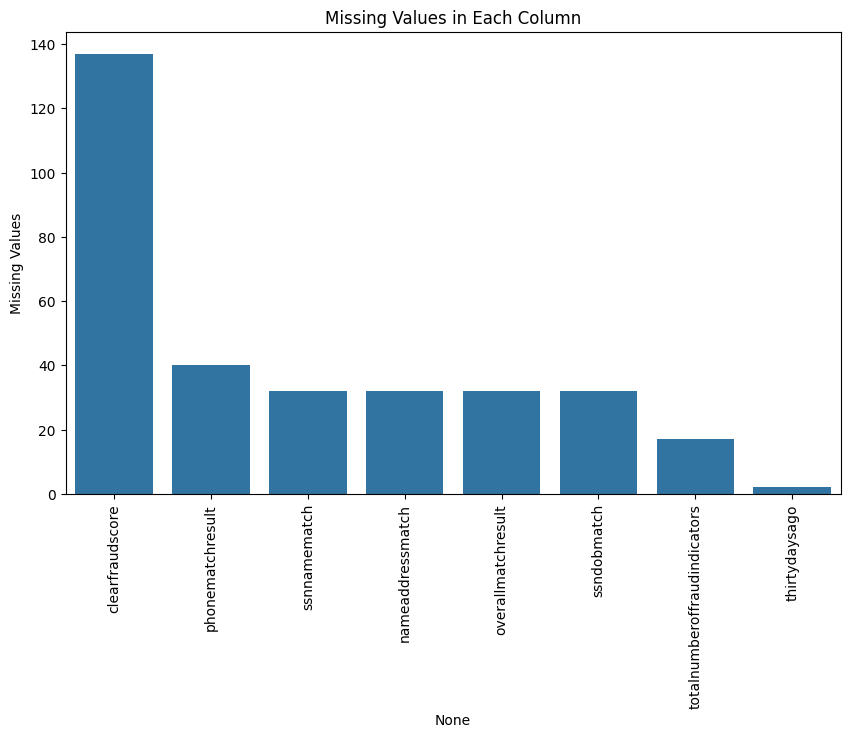

In [180]:
underwriting_eda.missing_values_analysis()

##### Handle missing values

In [186]:
import numpy as np


underwriting_preprocessor.replace_values([
    {
        'column': 'clearfraudscore',
        'from': np.nan,
        'to': 0
    },
    {
        'column': 'thirtydaysago',
        'from': np.nan,
        'to': 0
    },
     {
        'column': 'totalnumberoffraudindicators',
        'from': np.nan,
        'to': 0
    }
    
    
    
    ])

underwriting_preprocessor.drop_rows_with_nulls_in_columns(columns=['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus'])
underwriting_preprocessor.handle_missing_values(strategy='most_frequent', columns=['phonematchresult', 'ssnnamematch', 'nameaddressmatch', 'overallmatchresult', 'ssndobmatch'])

2024-09-19 08:25:02,033 - INFO - Replaced nan with 0 in column: clearfraudscore
2024-09-19 08:25:02,035 - INFO - Replaced nan with 0 in column: thirtydaysago
2024-09-19 08:25:02,037 - INFO - Replaced nan with 0 in column: totalnumberoffraudindicators
2024-09-19 08:25:02,038 - WARNING - Column loanId not found in DataFrame.
2024-09-19 08:25:02,039 - WARNING - Column apr not found in DataFrame.
2024-09-19 08:25:02,040 - WARNING - Column loanAmount not found in DataFrame.
2024-09-19 08:25:02,041 - WARNING - Column payFrequency not found in DataFrame.
2024-09-19 08:25:02,042 - WARNING - Column loanStatus not found in DataFrame.
2024-09-19 08:25:02,042 - INFO - Final shape after dropping rows with null values in columns: ['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus']. Initial shape: (49752, 9), Final shape: (49752, 9)
2024-09-19 08:25:02,061 - INFO - Handled missing values for column: phonematchresult using strategy: most_frequent
2024-09-19 08:25:02,079 - INFO - Handled miss

In [188]:
underwriting_eda = EDAAnalyzer(underwriting_preprocessor.df)

#### Clarity Underwriting Correlation Analysis

2024-09-19 08:25:50,262 - INFO - Generating correlation matrix for all features...
2024-09-19 08:25:50,281 - INFO - Encoded column: ssnnamematch
2024-09-19 08:25:50,293 - INFO - Encoded column: nameaddressmatch
2024-09-19 08:25:50,307 - INFO - Encoded column: phonematchresult
2024-09-19 08:25:50,320 - INFO - Encoded column: overallmatchresult
2024-09-19 08:25:50,336 - INFO - Encoded column: ssndobmatch
2024-09-19 08:25:50,533 - INFO - Encoded column: underwritingid


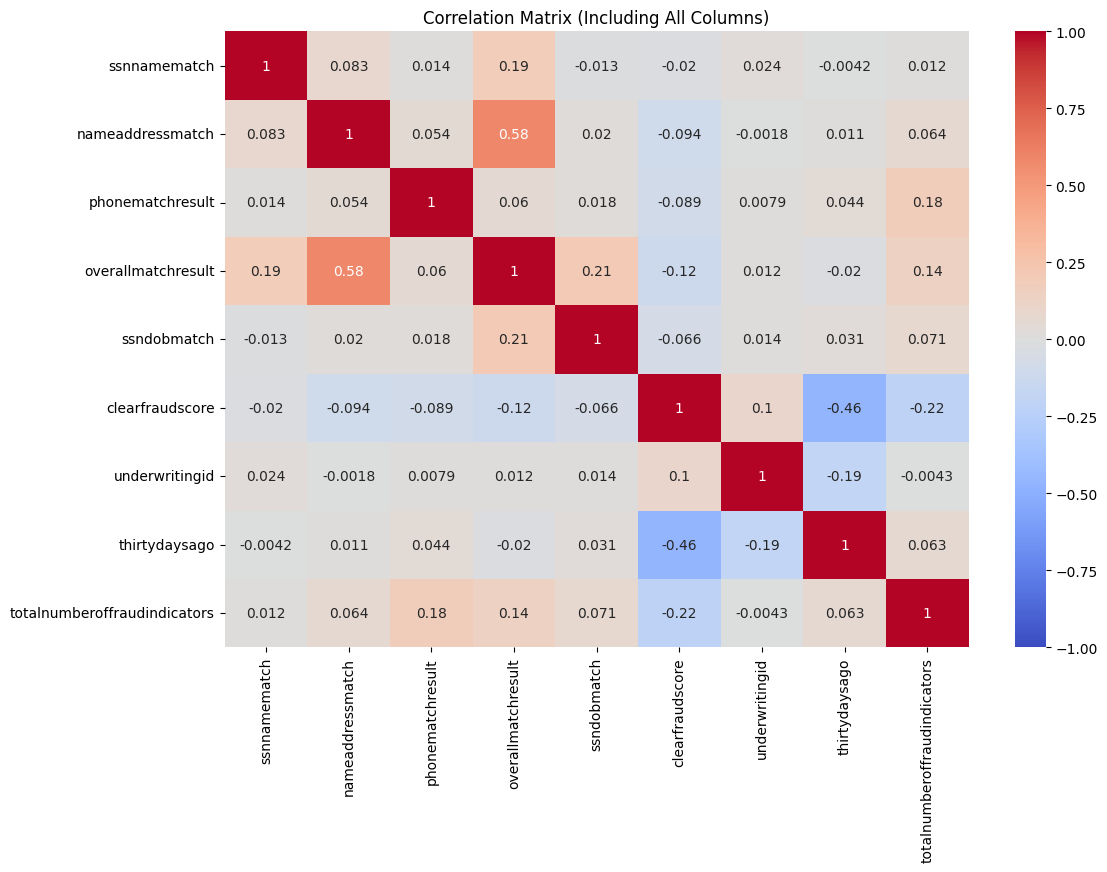

In [189]:
underwriting_eda.correlation_matrix_all_columns()

#### Merge loan, payment and clarity underwriting data

In [240]:
aggregated_df = payment_df.groupby('loanId').agg({
    'installmentIndex': 'max',  # Example: Keep the max installmentIndex
    'isCollection': 'first',    # Example: Take the first value (if it's boolean)
    'paymentDate': 'last',     # Take the first date (you can use 'min' if you want the earliest date)
    'principal': 'sum',         # Sum the principal amounts
    'fees': 'sum',              # Sum the fees
    'paymentAmount': 'sum',     # Sum the payment amounts
    'paymentStatus': 'last',   # Take the first payment status
    'paymentReturnCode': 'last'  # Take the first return code
}).reset_index()

# View the unique loanId DataFrame
aggregated_df.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,12,False,2016-04-28T22:44:43.736000,800.01,1235.21,2035.22,Checked,R01
1,LL-I-00000231,20,False,2015-05-15T04:00:00,1502.47,1896.55,3399.02,Cancelled,R01
2,LL-I-00000238,16,False,2015-05-18T04:00:00,1265.58,1467.08,2732.66,Cancelled,R08
3,LL-I-00000308,22,False,2015-06-11T04:00:00,391.72,963.26,1354.98,Cancelled,R08
4,LL-I-00000355,23,False,2015-05-14T04:00:00,1000.00,1451.52,2451.52,Cancelled,R02


In [241]:
aggregated_df.shape

(39952, 9)

In [251]:
import pandas as pd
loan_payment_df = pd.merge(loan_df, aggregated_df, on='loanId', how='left')
merged_df = pd.merge(loan_payment_df, underwriting_df, on='clarityFraudId', how='left')

In [252]:
merged_df.shape

(577682, 35)

In [253]:
merged_df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF',
       'installmentIndex', 'isCollection', 'paymentDate', 'principal', 'fees',
       'paymentAmount', 'paymentStatus', 'paymentReturnCode', 'ssnnamematch',
       'nameaddressmatch', 'phonematchresult', 'overallmatchresult',
       'ssndobmatch', 'clearfraudscore', 'thirtydaysago',
       'totalnumberoffraudindicators'],
      dtype='object')

In [254]:
merged_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,paymentStatus,paymentReturnCode,ssnnamematch,nameaddressmatch,phonematchresult,overallmatchresult,ssndobmatch,clearfraudscore,thirtydaysago,totalnumberoffraudindicators
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,Cancelled,None,match,match,invalid,partial,invalid,879.0,3.0,0.0
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculate loan_age

In [265]:
from src.utils.utils import add_loan_age
merged_df = add_loan_age(merged_df)

In [269]:
merged_eda = EDAAnalyzer(merged_df)
merged_preprocessor = DataPreprocessor(merged_df)

#### drop unwanted columns

In [270]:
merged_df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF',
       'installmentIndex', 'isCollection', 'paymentDate', 'principal', 'fees',
       'paymentAmount', 'paymentStatus', 'paymentReturnCode', 'ssnnamematch',
       'nameaddressmatch', 'phonematchresult', 'overallmatchresult',
       'ssndobmatch', 'clearfraudscore', 'thirtydaysago',
       'totalnumberoffraudindicators', 'loan_age'],
      dtype='object')

In [271]:
merged_preprocessor.drop_columns(columns=['loanId', 'clarityFraudId', 'anon_ssn', 'applicationDate', 'originatedDate', 'paymentDate'])

2024-09-19 09:04:16,222 - INFO - Dropped column: loanId
2024-09-19 09:04:16,425 - INFO - Dropped column: clarityFraudId
2024-09-19 09:04:16,629 - INFO - Dropped column: anon_ssn
2024-09-19 09:04:16,823 - INFO - Dropped column: applicationDate
2024-09-19 09:04:17,070 - INFO - Dropped column: originatedDate
2024-09-19 09:04:17,245 - INFO - Dropped column: paymentDate


#### Correlation matrix

In [272]:
merged_eda = EDAAnalyzer(merged_preprocessor.df)

2024-09-19 09:04:40,670 - INFO - Generating correlation matrix for all features...
2024-09-19 09:04:41,025 - INFO - Encoded column: payFrequency
2024-09-19 09:04:41,152 - INFO - Encoded column: loanStatus
2024-09-19 09:04:41,279 - INFO - Encoded column: state
2024-09-19 09:04:41,408 - INFO - Encoded column: leadType
2024-09-19 09:04:41,636 - INFO - Encoded column: fpStatus
2024-09-19 09:04:41,876 - INFO - Encoded column: isCollection
2024-09-19 09:04:42,157 - INFO - Encoded column: paymentStatus
2024-09-19 09:04:42,425 - INFO - Encoded column: paymentReturnCode
2024-09-19 09:04:42,648 - INFO - Encoded column: ssnnamematch
2024-09-19 09:04:42,860 - INFO - Encoded column: nameaddressmatch
2024-09-19 09:04:43,081 - INFO - Encoded column: phonematchresult
2024-09-19 09:04:43,314 - INFO - Encoded column: overallmatchresult
2024-09-19 09:04:43,607 - INFO - Encoded column: ssndobmatch


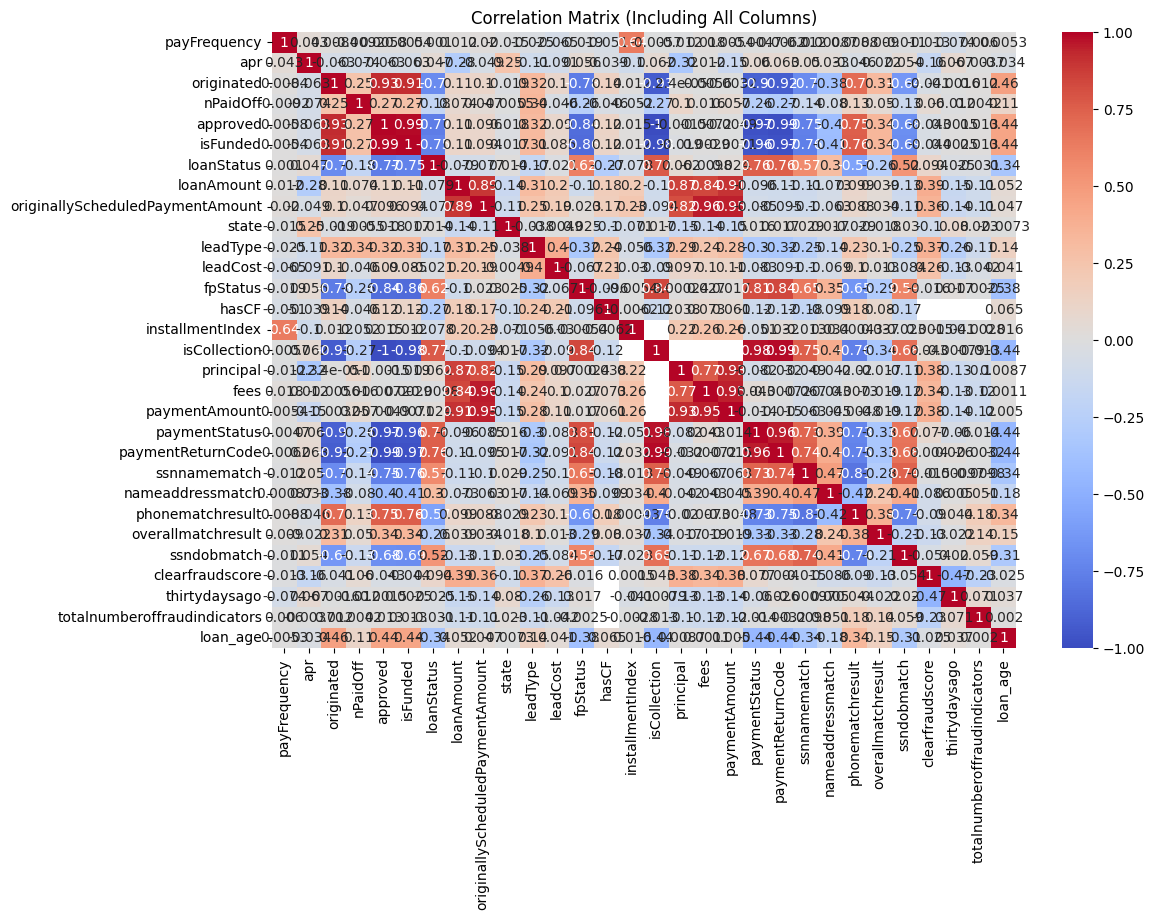

In [273]:
merged_eda.correlation_matrix_all_columns()

-  drop columns with more than 90 percent co-relation

In [274]:
merged_preprocessor.drop_highly_correlated()

2024-09-19 09:04:59,422 - INFO - Dropped highly correlated categorical columns: ['approved', 'isFunded', 'isCollection', 'fees', 'paymentAmount', 'paymentStatus', 'paymentReturnCode']


- drop due to high correlation
  - 'approved', 'isFunded', 'isCollection', 'fees', 'paymentAmount', 'paymentStatus', 'paymentReturnCode'

In [277]:
merged_preprocessor.df.shape

(577682, 23)

##### missing value analysis

2024-09-19 09:06:21,859 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                              Missing Values  Percentage
clearfraudscore                       541457   93.729249
phonematchresult                      541389   93.717478
ssnnamematch                          541381   93.716093
ssndobmatch                           541381   93.716093
overallmatchresult                    541381   93.716093
nameaddressmatch                      541381   93.716093
totalnumberoffraudindicators          541370   93.714189
thirtydaysago                         541349   93.710554
principal                             537730   93.084084
installmentIndex                      537730   93.084084
fpStatus                              525959   91.046458
apr                                     3922    0.678920
loanAmount                              2250    0.389488
payFrequency                            1273    0.220363
loanStatus                               391    0.067684
state                                    132    0.02285

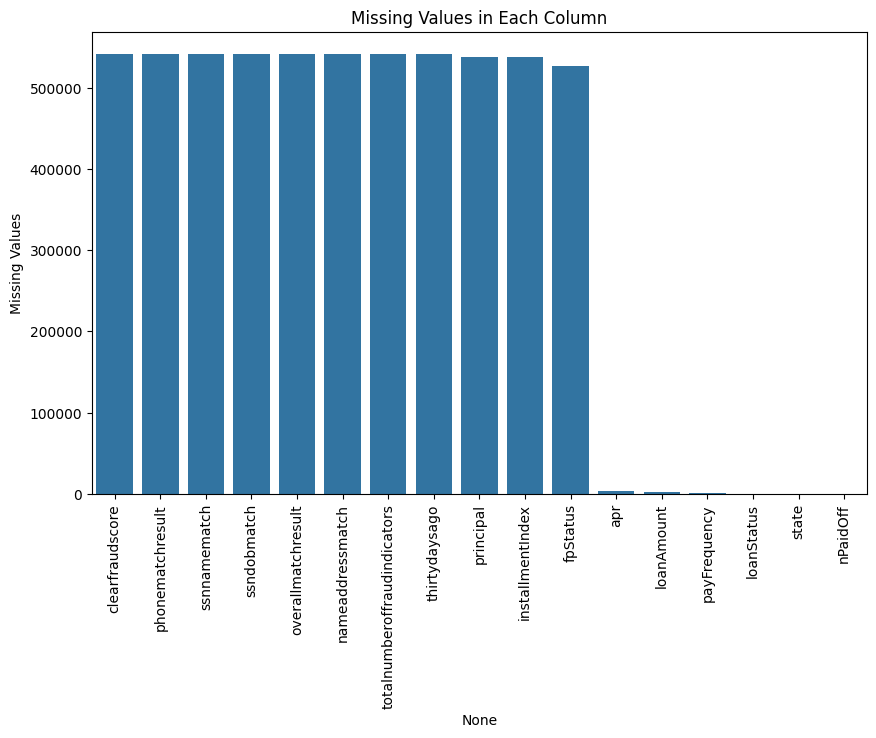

In [278]:
merged_eda = EDAAnalyzer(merged_preprocessor.df)
merged_eda.missing_values_analysis()

In [280]:
merged_eda.df.columns

Index(['payFrequency', 'apr', 'originated', 'nPaidOff', 'loanStatus',
       'loanAmount', 'originallyScheduledPaymentAmount', 'state', 'leadType',
       'leadCost', 'fpStatus', 'hasCF', 'installmentIndex', 'principal',
       'ssnnamematch', 'nameaddressmatch', 'phonematchresult',
       'overallmatchresult', 'ssndobmatch', 'clearfraudscore', 'thirtydaysago',
       'totalnumberoffraudindicators', 'loan_age'],
      dtype='object')

In [291]:
merged_preprocessor.df.shape

(577682, 23)

### Missing Value Handling and Column Dropping

- **Replaced Missing Values**:
  - `clearfraudscore`, `totalnumberoffraudindicators`, `thirtydaysago`: Missing values replaced with `0`.
  - `overallmatchresult`: Missing values replaced with `'unknown'`.
  - `fpStatus`: Missing values replaced with `'NoAchAttempt'`.
  - `nPaidOff`: Missing values replaced with `0`.

- **Dropped Rows**:
  - Rows with missing values in `loanId`, `apr`, `loanAmount`, `payFrequency`, and `loanStatus` were dropped due to the small percentage of missing values and co-occurrence of missing data in key columns.

- **Dropped Columns**:
  - `phonematchresult`, `ssnnamematch`, `nameaddressmatch`, `overallmatchresult`, `ssndobmatch`, `principal`, `installmentIndex`, and `state` were dropped due to high missing values (>90%), redundancy, or minimal contribution to model performance.

In [295]:
import numpy as np

merged_preprocessor.replace_values([
    {
        'column': 'clearfraudscore',
        'from': np.nan,
        'to': 0
    },
     {
        'column': 'totalnumberoffraudindicators',
        'from': np.nan,
        'to': 0
    },
       {
        'column': 'thirtydaysago',
        'from': np.nan,
        'to': 0
    },
    
    {
        'column': 'overallmatchresult',
        'from': np.nan,
        'to': 'unknown'
    },
    
    {
        'column': 'fpStatus',
        'from': np.nan,
        'to': 'NoAchAttempt'
    },
    {
        'column': 'nPaidOff',
        'from': np.nan,
        'to': 0
    } 
    
    ])

merged_preprocessor.drop_rows_with_nulls_in_columns(columns=['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus'])
merged_preprocessor.drop_columns(columns=['phonematchresult', 'ssnnamematch', 'nameaddressmatch', 'overallmatchresult', 'ssndobmatch', 'principal', 'installmentIndex', 'state'])



2024-09-19 09:24:44,458 - INFO - Replaced nan with 0 in column: clearfraudscore
2024-09-19 09:24:44,464 - INFO - Replaced nan with 0 in column: totalnumberoffraudindicators
2024-09-19 09:24:44,470 - INFO - Replaced nan with 0 in column: thirtydaysago
2024-09-19 09:24:44,471 - WARNING - Column overallmatchresult not found in DataFrame.
2024-09-19 09:24:44,558 - INFO - Replaced nan with NoAchAttempt in column: fpStatus
2024-09-19 09:24:44,564 - INFO - Replaced nan with 0 in column: nPaidOff
2024-09-19 09:24:44,565 - WARNING - Column loanId not found in DataFrame.
2024-09-19 09:24:44,798 - INFO - Dropped rows with null values in column apr. Before: (572377, 16), After: (572377, 16)
2024-09-19 09:24:44,857 - INFO - Dropped rows with null values in column loanAmount. Before: (572377, 16), After: (572377, 16)
2024-09-19 09:24:44,936 - INFO - Dropped rows with null values in column payFrequency. Before: (572377, 16), After: (572377, 16)
2024-09-19 09:24:45,016 - INFO - Dropped rows with null 

In [297]:
merged_preprocessor.df.shape

(572377, 15)

In [303]:
merged_preprocessor.df.to_csv('data/pre_processed_data.csv', index=False)